<a href="https://colab.research.google.com/github/jyothish-mohan/Neural_Style_Transfer/blob/main/Neural_Style_Transfer_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
content_img = 'drive/MyDrive/Images/jyo.jpg'
style_img = 'drive/MyDrive/Images/style.jpg'

In [3]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,img_to_array,array_to_img
import cv2
import numpy as np 

In [4]:
def load_image(filepath):
  img = load_img(filepath)
  img = img_to_array(img)/255.0
  img = tf.cast(img,tf.float32)
  img = tf.image.resize(img,(600,600))
  img = img[tf.newaxis,:]
  return img

In [27]:
content_img = load_image(content_img)
style_img = load_image(style_img)

In [6]:
style_content_layers = ['block1_conv1','block2_conv1','block3_conv1','block4_conv1','block5_conv1']

In [7]:
class VGG(tf.keras.models.Model):
  def __init__(self,style_content_layers):
    super().__init__()
    self.vgg = tf.keras.applications.VGG19(include_top=False,weights='imagenet')
    self.vgg.trainable = False
    self.features = style_content_layers
  def call(self,inputs):
    inputs = inputs*255.0
    model_layers = [self.vgg.get_layer(name).output for name in self.features]
    model = keras.models.Model([self.vgg.input],model_layers)
    preprocessed_inputs = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = model(preprocessed_inputs)
    return outputs

In [8]:
model = VGG(style_content_layers)

80142336/80134624 [==============================] - 0s 0us/step


In [9]:
generated_img = tf.Variable(content_img)

In [10]:
lr = 0.02
total_steps = 3000
alpha = 1e-2 
beta = 1e-4
optim = tf.keras.optimizers.Adam(learning_rate=lr,beta_1=0.99,epsilon=1e-1)

In [11]:
for step in range(total_steps):
    with tf.GradientTape() as tape:
        gen_feat = model(generated_img)[1]
        content_feat = model(content_img)[1]
        style_feat = model(style_img)[1]
        content_loss = tf.math.reduce_mean(tf.math.abs(gen_feat-content_feat)**2)

        gram_style = tf.linalg.einsum('bijc,bijd->bcd',style_feat,style_feat)
        gram_gen = tf.linalg.einsum('bijc,bijd->bcd',gen_feat,gen_feat)
        style_loss = tf.math.reduce_mean(tf.math.abs(gram_style-gram_gen)**2)
        total_loss = alpha*content_loss + beta*style_loss
        
    grad = tape.gradient(total_loss,generated_img)
    optim.apply_gradients([(grad,generated_img)])
    
    if step%200==0:
        print(total_loss)

tf.Tensor(521951640000000.0, shape=(), dtype=float32)
tf.Tensor(1869243600000.0, shape=(), dtype=float32)
tf.Tensor(462984500000.0, shape=(), dtype=float32)
tf.Tensor(189255480000.0, shape=(), dtype=float32)
tf.Tensor(107921760000.0, shape=(), dtype=float32)
tf.Tensor(71750770000.0, shape=(), dtype=float32)
tf.Tensor(50864366000.0, shape=(), dtype=float32)
tf.Tensor(37084650000.0, shape=(), dtype=float32)
tf.Tensor(27550587000.0, shape=(), dtype=float32)
tf.Tensor(20629422000.0, shape=(), dtype=float32)
tf.Tensor(15564552000.0, shape=(), dtype=float32)
tf.Tensor(11836901000.0, shape=(), dtype=float32)
tf.Tensor(9041323000.0, shape=(), dtype=float32)
tf.Tensor(6930613000.0, shape=(), dtype=float32)
tf.Tensor(5313796600.0, shape=(), dtype=float32)


In [17]:
cv2.imwrite('drive/MyDrive/Images/generated_img.jpg', cv2.cvtColor(np.squeeze(generated_img)*255, cv2.COLOR_BGR2RGB))

True

**GENERATED IMAGE**

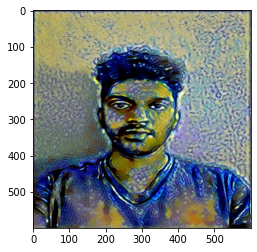

In [33]:
import matplotlib.pyplot as plt

im = cv2.imread('drive/MyDrive/Images/generated_img.jpg')
im = image = cv2.rotate(im, cv2.cv2.ROTATE_90_CLOCKWISE)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

**STYLE IMAGE**

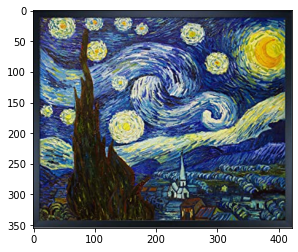

In [34]:
style = cv2.imread('drive/MyDrive/Images/style.jpg')
plt.imshow(cv2.cvtColor(style, cv2.COLOR_BGR2RGB))
plt.show()

**CONTENT IMAGE**

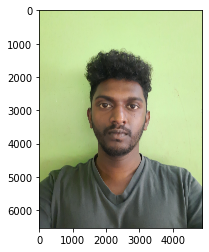

In [37]:
content = cv2.imread('drive/MyDrive/Images/jyo.jpg')
plt.imshow(cv2.cvtColor(content, cv2.COLOR_BGR2RGB))
plt.show()